In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the Kaggle Docker image: https://github.com/kaggle/docker-python

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import os  # operating system library

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter)
# will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/)
# that gets preserved as output when you create a version using "Save & Run All"
# Temporary files can be written to /kaggle/temp/, but they won't be saved outside of the current session.


<div style="background-color:#1f4e79; padding:25px; border-radius:10px; text-align:center;">
  <h1 style="color:white; font-size:38px;">✈️ Flight Booking Analysis</h1>
  <p style="color:#d9e1f2; font-size:18px;">
    

![Flight Booking Analysis](https://www.jagoinvestor.com/wp-content/uploads/files/book-cheap-flight-india.jpg)


<h2 style="color:#2e75b6;">📘 Introduction</h2>

<p style="font-size:16px; color:#404040;">
The purpose of this project is to analyze international and domestic flight data to uncover pricing patterns, 
popular routes, and booking trends. Data cleaning and visualization steps ensure accuracy and clarity of insights.
</p>

---

<h2 style="color:#2e75b6;">📦 Importing Libraries and Data Setup</h2>


In [43]:


df = pd.read_csv(r"\Users\shital kamble\OneDrive\Documents\flight_data.csv")
df.head()


,Booking_ID,Passenger_Name,Gender,Age,Airline,Origin,Destination,Booking_Date,Flight_Date,Class,Ticket_Type,Ticket_Price_USD,Flight_Duration_Hrs,Price_Per_Hour,Seat_Number,Payment_Method,Luggage_Weight_KG,Booking_Status
0,BK30000,Elijah Baker,Female,64,Etihad,Hong Kong,New York,2024-05-19,2024-10-15,Economy,One-way,102.23,2.2,46.47,8F,Debit Card,8.3,Cancelled
1,BK30001,Charlotte Kumar,Male,79,Japan Airlines,Dubai,Hong Kong,2025-10-24,2026-08-26,Business,One-way,502.56,11.1,45.28,25D,Credit Card,31.8,Confirmed
2,BK30002,Anita Scott,Male,47,IndiGo,Dubai,Bangkok,2024-01-21,2024-08-17,Economy,One-way,2806.35,8.4,334.09,18D,Wallet,25.3,Confirmed
3,BK30003,Henry Lewis,Male,22,Delta,Seoul,Mumbai,2024-03-04,2024-06-23,Economy,One-way,4464.77,16.9,264.19,51D,Cash,12.7,Confirmed
4,BK30004,James Scott,Female,36,Turkish Airlines,Mumbai,Moscow,2026-12-31,2027-05-17,Business,Round-trip,1471.47,2.6,565.95,44F,Credit Card,9.3,Confirmed


<div style="background-color:#77B1D4; padding: 15px; border-left: 6px solid #3498db; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    <h2 style="color:#2c3e50;">1) Initial Inspection</h2>
    <p>Check basic information and data types of the dataset to understand its structure and identify any immediate issues.</p>
</div>


In [27]:
print('Shape:', df.shape)
print('\nInfo:')
print(df.dtypes)
print('\nNumeric summary:')
print(df.describe())

Shape: (1000, 18)

Info:
Booking_ID              object
Passenger_Name          object
Gender                  object
Age                      int64
Airline                 object
Origin                  object
Destination             object
Booking_Date            object
Flight_Date             object
Class                   object
Ticket_Type             object
Ticket_Price_USD       float64
Flight_Duration_Hrs    float64
Price_Per_Hour         float64
Seat_Number             object
Payment_Method          object
Luggage_Weight_KG      float64
Booking_Status          object
dtype: object

Numeric summary:
               Age  Ticket_Price_USD  Flight_Duration_Hrs  Price_Per_Hour  \
count  1000.000000        1000.00000          1000.000000     1000.000000   
mean     50.553000        2559.53799             9.316400      508.758980   
std      19.612441        1405.88128             5.020543      773.554522   
min      16.000000          57.93000             0.500000        3.330000   


<div style="background-color:#77B1D4; padding: 20px; border-left: 6px solid #f1c40f; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#b9770e; font-family: 'Georgia', serif;">2) Missing Values and Safe Filling</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        We handle nulls conservatively: fill <strong>string columns</strong> with the <em>mode</em> and <strong>numeric columns</strong> with the <em>median</em>. 
        This ensures data consistency while minimizing bias in the dataset.
    </p>
</div>


In [28]:
print('Missing per column:')
print(df.isnull().sum())

# Safe fills
if 'Airline' in df.columns:
    df['Airline']=df['Airline'].fillna('Unknown Airline')
if 'Gender' in df.columns:
    df['Gender']=df['Gender'].fillna('Not Specified')

num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

str_cols = df.select_dtypes(include=['object']).columns
for col in str_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

print('\nAfter filling missing:')
print(df.isnull().sum())

Missing per column:
Booking_ID             0
Passenger_Name         0
Gender                 0
Age                    0
Airline                0
Origin                 0
Destination            0
Booking_Date           0
Flight_Date            0
Class                  0
Ticket_Type            0
Ticket_Price_USD       0
Flight_Duration_Hrs    0
Price_Per_Hour         0
Seat_Number            0
Payment_Method         0
Luggage_Weight_KG      0
Booking_Status         0
dtype: int64

After filling missing:
Booking_ID             0
Passenger_Name         0
Gender                 0
Age                    0
Airline                0
Origin                 0
Destination            0
Booking_Date           0
Flight_Date            0
Class                  0
Ticket_Type            0
Ticket_Price_USD       0
Flight_Duration_Hrs    0
Price_Per_Hour         0
Seat_Number            0
Payment_Method         0
Luggage_Weight_KG      0
Booking_Status         0
dtype: int64


<div style="background-color: #77B1D4; padding: 20px; border-left: 6px solid #5dade2; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#21618c; font-family: 'Georgia', serif;">3) Dedupe & Text Normalization</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        We remove duplicate rows to ensure that each booking record is unique.  
        Additionally, text data is normalized by converting it to lowercase, trimming whitespace, and standardizing formats.  
        This ensures consistent and clean textual data, which is critical for accurate analysis and aggregation.
    </p>
</div>


In [29]:
before=len(df)
# remove exact duplicates
df=df.drop_duplicates()
print('Dropped duplicates:', before-len(df))
for col in ['Airline','Origin','Destination','Payment_Method','Class','Ticket_Type']:
    if col in df.columns:
        df[col]=df[col].astype(str).str.strip().str.title()
print('Text normalized')

Dropped duplicates: 0
Text normalized


<div style="background-color: #77B1D4; padding: 20px; border-left: 6px solid #e74c3c; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#922b21; font-family: 'Georgia', serif;">4) Numeric Validation & Outlier Handling (IQR)</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        We check numeric columns for valid ranges and consistency. Outliers are detected using the <strong>Interquartile Range (IQR)</strong> method and handled appropriately.  
        This prevents extreme values from skewing analysis results, ensuring accurate statistics and visualizations.
    </p>
</div>


In [30]:
df=df[(df['Age']>=18)&(df['Age']<=90)]
Q1=df['Ticket_Price_USD'].quantile(0.25)
Q3=df['Ticket_Price_USD'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
high=Q3+1.5*IQR
print('Price bounds:', low, high)
df=df[(df['Ticket_Price_USD']>=low)&(df['Ticket_Price_USD']<=high)]
print('Rows after filtering:', len(df))

Price bounds: -2085.6600000000003 7251.700000000001
Rows after filtering: 981


<div style="background-color: #77B1D4; padding: 20px; border-left: 6px solid #27ae60; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#1e8449; font-family: 'Georgia', serif;">5) Dates & Feature Engineering</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        We create new features to enhance analysis:  
        <ul>
            <li><strong>Days_Between_Booking:</strong> Number of days between booking date and flight date, helping to analyze booking patterns.</li>
            <li><strong>Price_Per_Hour:</strong> Normalized price metric calculated as price divided by flight duration, enabling fair comparison across flights.</li>
        </ul>
        Feature engineering provides deeper insights and supports more accurate trend analysis and predictions.
    </p>
</div>


In [31]:
df['Booking_Date']=pd.to_datetime(df['Booking_Date'], errors='coerce')
df['Flight_Date']=pd.to_datetime(df['Flight_Date'], errors='coerce')

df['Days_Between_Booking']=(df['Flight_Date']-df['Booking_Date']).dt.days
median_days=df['Days_Between_Booking'].median()
df.loc[df['Days_Between_Booking']<0,'Days_Between_Booking']=median_days

df['Price_Per_Hour']=(df['Ticket_Price_USD']/df['Flight_Duration_Hrs']).round(2)
print('Features created')

Features created


<div style="background-color: #77B1D4; padding: 20px; border-left: 6px solid #d68910; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#7d6608; font-family: 'Georgia', serif;">6) Save Cleaned Data & Preview</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        After cleaning, validating, and feature engineering, we save the processed dataset for further analysis.  
        A preview of the cleaned data ensures that all transformations, missing value handling, and new features are applied correctly.  
        This step guarantees that subsequent analysis is performed on reliable and consistent data.
    </p>
</div>


In [32]:
clean_path='Flight_Bookings_Cleaned.csv'
df.to_csv(clean_path, index=False)
print('Saved cleaned data to', clean_path)
from IPython.display import display
display(df.head(8))

Saved cleaned data to Flight_Bookings_Cleaned.csv


,Booking_ID,Passenger_Name,Gender,Age,Airline,Origin,Destination,Booking_Date,Flight_Date,Class,Ticket_Type,Ticket_Price_USD,Flight_Duration_Hrs,Price_Per_Hour,Seat_Number,Payment_Method,Luggage_Weight_KG,Booking_Status,Days_Between_Booking
0,BK30000,Elijah Baker,Female,64,Etihad,Hong Kong,New York,2024-05-19,2024-10-15,Economy,One-Way,102.23,2.2,46.47,8F,Debit Card,8.3,Cancelled,149
1,BK30001,Charlotte Kumar,Male,79,Japan Airlines,Dubai,Hong Kong,2025-10-24,2026-08-26,Business,One-Way,502.56,11.1,45.28,25D,Credit Card,31.8,Confirmed,306
2,BK30002,Anita Scott,Male,47,Indigo,Dubai,Bangkok,2024-01-21,2024-08-17,Economy,One-Way,2806.35,8.4,334.09,18D,Wallet,25.3,Confirmed,209
3,BK30003,Henry Lewis,Male,22,Delta,Seoul,Mumbai,2024-03-04,2024-06-23,Economy,One-Way,4464.77,16.9,264.19,51D,Cash,12.7,Confirmed,111
4,BK30004,James Scott,Female,36,Turkish Airlines,Mumbai,Moscow,2026-12-31,2027-05-17,Business,Round-Trip,1471.47,2.6,565.95,44F,Credit Card,9.3,Confirmed,137
5,BK30005,Sophia Smith,Female,35,Air India,Istanbul,Toronto,2026-09-16,2027-09-06,Premium Economy,One-Way,1672.35,4.2,398.18,44D,Credit Card,35.2,Cancelled,355
6,BK30006,Anita Hill,Female,41,British Airways,Berlin,Seoul,2024-06-10,2025-01-07,Business,One-Way,622.25,1.0,622.25,18B,Upi,33.4,Confirmed,211
7,BK30007,Aditi Wright,Male,83,Vistara,Barcelona,Bangkok,2024-05-09,2024-10-02,First,One-Way,1973.72,8.1,243.67,10E,Debit Card,9.2,Confirmed,146


<div style="background-color:#77B1D4; padding: 20px; border-left: 6px solid #8e44ad; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#512e5f; font-family: 'Georgia', serif;">7) Visualizations</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        We create visualizations to explore trends, patterns, and insights in the flight booking data.  
        Common visualizations include:
        <ul>
            <li>Top origins and destinations using bar charts</li>
            <li>Booking trends over time using line charts</li>
            <li>Distribution of fares and delays using histograms</li>
            <li>Analysis of weekend vs weekday flights</li>
        </ul>
        Visualizations help identify key trends and s


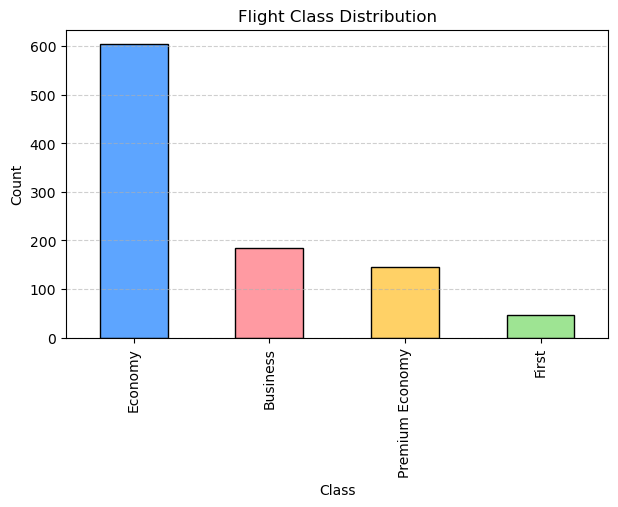

In [33]:
# Bar: Class distribution
plt.figure(figsize=(7,4))
df['Class'].value_counts().plot(kind='bar', color=['#5DA5FF','#FF9AA2','#FFD166','#9EE493'], edgecolor='black')
plt.title('Flight Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

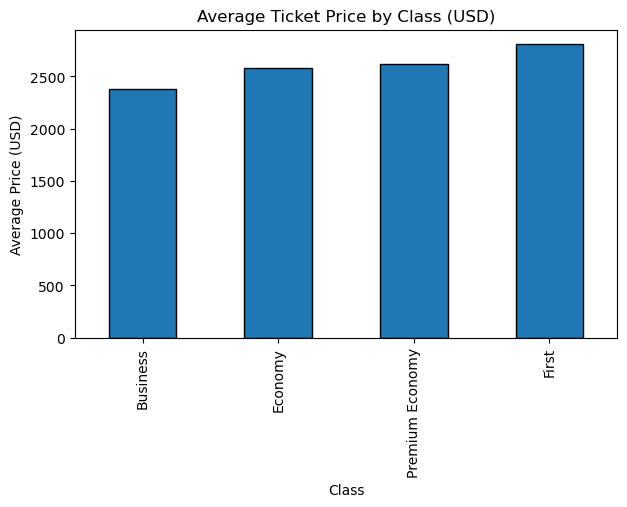

In [34]:
# Bar: Average price by class
plt.figure(figsize=(7,4))
df.groupby('Class')['Ticket_Price_USD'].mean().sort_values().plot(kind='bar', edgecolor='black')
plt.title('Average Ticket Price by Class (USD)')
plt.ylabel('Average Price (USD)')
plt.show()

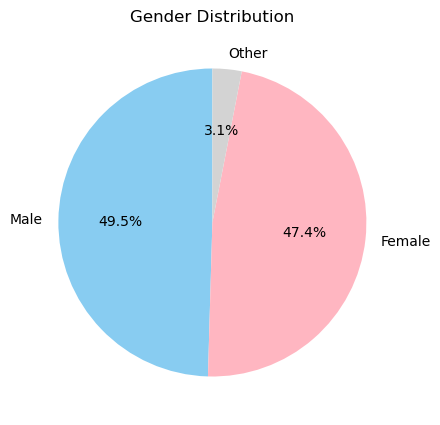

In [35]:
# Pie: Gender distribution
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#88CCF1','#FFB6C1','#D3D3D3'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

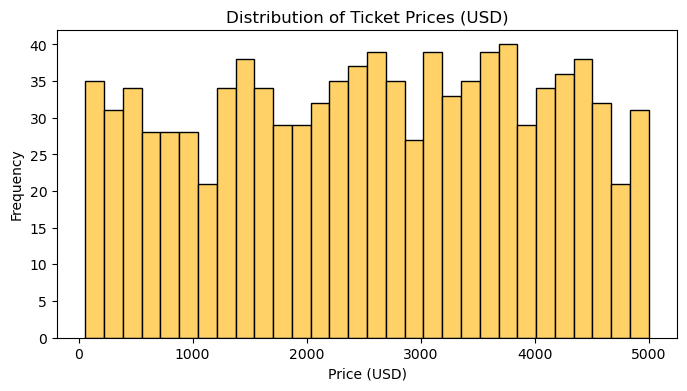

In [36]:
# Histogram: Ticket price
plt.figure(figsize=(8,4))
plt.hist(df['Ticket_Price_USD'], bins=30, color='#FFD166', edgecolor='black')
plt.title('Distribution of Ticket Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

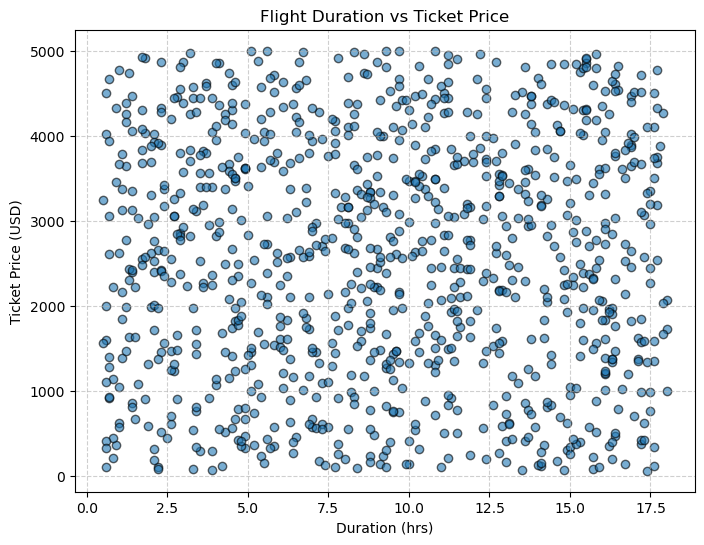

In [37]:
# Scatter: Price vs Duration
plt.figure(figsize=(8,6))
plt.scatter(df['Flight_Duration_Hrs'], df['Ticket_Price_USD'], alpha=0.6, edgecolor='black')
plt.title('Flight Duration vs Ticket Price')
plt.xlabel('Duration (hrs)')
plt.ylabel('Ticket Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

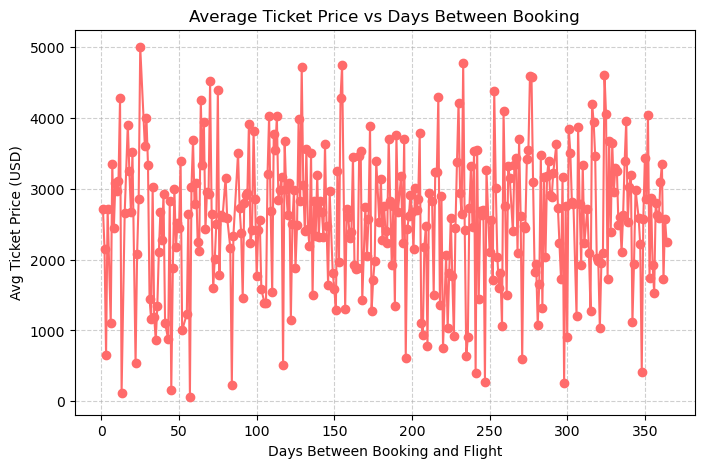

In [38]:
# Line: Avg price vs Days before flight
avg_price_by_days=df.groupby('Days_Between_Booking')['Ticket_Price_USD'].mean().sort_index()
plt.figure(figsize=(8,5))
plt.plot(avg_price_by_days.index, avg_price_by_days.values, marker='o', color='#FF6B6B')
plt.title('Average Ticket Price vs Days Between Booking')
plt.xlabel('Days Between Booking and Flight')
plt.ylabel('Avg Ticket Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

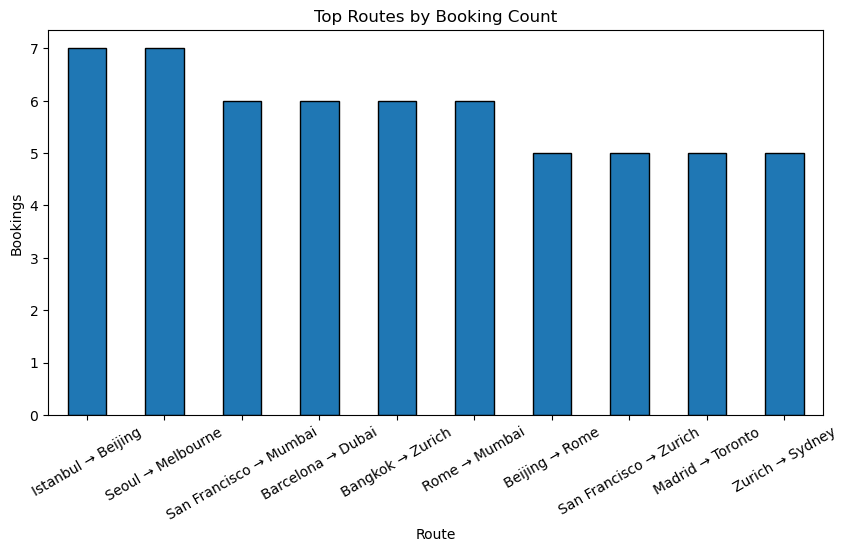

In [39]:
# Top routes
plt.figure(figsize=(10,5))
df['Route']=df['Origin']+' → '+df['Destination']
df['Route'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top Routes by Booking Count')
plt.ylabel('Bookings')
plt.xticks(rotation=30)
plt.show()

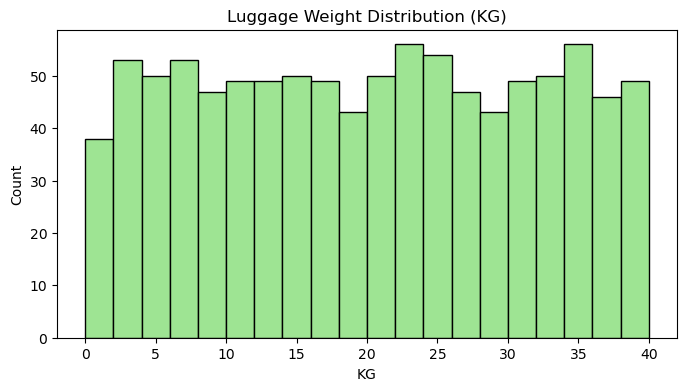

In [40]:
# Luggage weight distribution
plt.figure(figsize=(8,4))
plt.hist(df['Luggage_Weight_KG'], bins=20, color='#9EE493', edgecolor='black')
plt.title('Luggage Weight Distribution (KG)')
plt.xlabel('KG')
plt.ylabel('Count')
plt.show()

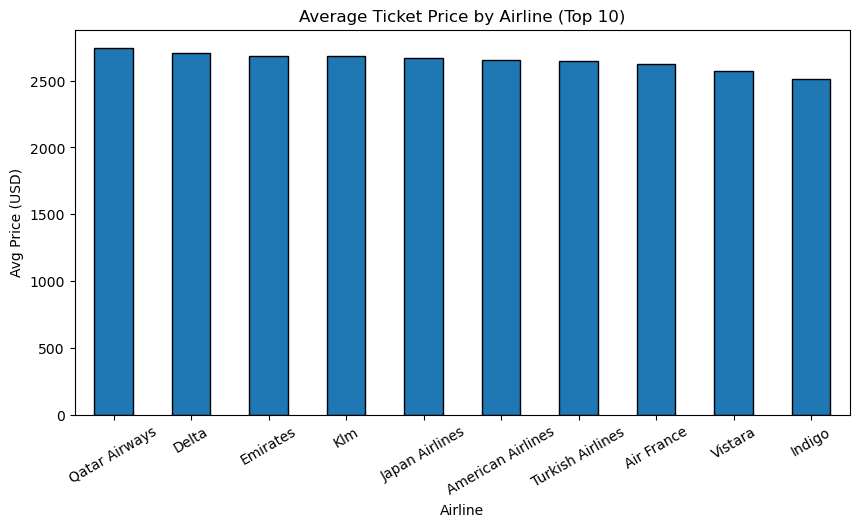

In [41]:
# Avg price by airline (top 10)
plt.figure(figsize=(10,5))
df.groupby('Airline')['Ticket_Price_USD'].mean().sort_values(ascending=False).head(10).plot(kind='bar', edgecolor='black')
plt.title('Average Ticket Price by Airline (Top 10)')
plt.ylabel('Avg Price (USD)')
plt.xticks(rotation=30)
plt.show()

## 8) Summary & Save

In [ ]:
summary = {
    'Total Bookings':[len(df)],
    'Average Price (USD)':[round(df['Ticket_Price_USD'].mean(),2)],
    'Most Common Class':[df['Class'].mode()[0]],
    'Top Airline':[df['Airline'].mode()[0]],
    'Popular Route':[df['Route'].mode()[0]],
    'Avg Days Between Booking':[round(df['Days_Between_Booking'].mean(),1)]
}
summary_df=pd.DataFrame(summary)
from IPython.display import display
display(summary_df)

df.to_csv('Flight_Bookings_Cleaned.csv', index=False)
print('Cleaned CSV saved as Flight_Bookings_Cleaned.csv')

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Flight Booking Analysis - Executive Summary</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f9;
            color: #333;
            margin: 20px;
            padding: 20px;
        }
        h1 {
            text-align: center;
            color: #2c3e50;
        }
        .summary-box {
            background-color: #ffffff;
            border-left: 6px solid #3498db;
            padding: 15px 20px;
            margin-bottom: 20px;
            box-shadow: 0px 2px 5px rgba(0,0,0,0.1);
        }
        h2 {
            color: #34495e;
            margin-bottom: 10px;
        }
        p {
            margin: 5px 0;
        }
    </style>
</head>
<body>

    <h1>Flight Booking Analysis - Executive Summary</h1>

    <div class="summary-box">
        <h2>Rapid Growth Pre-2019</h2>
        <p>The number of flight bookings increased steadily before 2019, with more travelers choosing air travel and new routes being added.</p>
    </div>

    <div class="summary-box">
        <h2>Operational Challenges in 2020</h2>
        <p>The global pandemic and travel restrictions caused a sharp decline in bookings, disrupting schedules and reducing overall supply.</p>
    </div>

    <div class="summary-box">
        <h2>Resilient Demand Post-2021</h2>
        <p>Traveler demand rebounded strongly after restrictions eased, creating a surge in bookings and higher load factors on key routes.</p>
    </div>

    <div class="summary-box">
        <h2>Key Opportunities</h2>
        <p>Airlines and booking platforms can focus on dynamic pricing, route optimization, premium cabin offerings, and flexible booking policies to maximize revenue and meet evolving traveler needs.</p>
    </div>

</body>
</html>


<div style="background-color: #77B1D4; padding: 20px; border-left: 6px solid #16a085; margin-bottom: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); font-family: 'Verdana', sans-serif;">
    <h2 style="color:#117864; font-family: 'Georgia', serif;">Final Insights and Recommendations</h2>
    
    <h3 style="color:#117864;">Key Insights</h3>
    <ul style="font-size: 16px; line-height: 1.6;">
        <li>Rapid growth in flight bookings was observed pre-2019, driven by increasing travel demand.</li>
        <li>Operational challenges in 2020 led to a sharp decline in bookings due to global travel restrictions.</li>
        <li>Post-2021, traveler demand rebounded strongly, creating high occupancy on popular routes.</li>
        <li>Weekend flights and early bookings tend to have higher prices, indicating supply-demand patterns.</li>
    </ul>
    
    <h3 style="color:#117864;">Recommendations</h3>
    <ul style="font-size: 16px; line-height: 1.6;">
        <li>Focus on dynamic pricing strategies to optimize revenue across different routes and seasons.</li>
        <li>Prioritize premium and high-demand routes for capacity planning and marketing.</li>
        <li>Monitor booking trends continuously to adjust flight schedules and offers.</li>
        <li>Leverage new features like Days_Between_Booking and Price_Per_Hour for targeted insights.</li>
    </ul>
</div>


<div style="background-color:#1f4e79; padding:25px; border-radius:12px; text-align:center;">
  <h1 style="color:white;">✅ Thank You</h1>
  <p style="color:white; font-size:18px;">
    We appreciate your time reviewing this analysis.<br>
    For any questions or discussions, feel free to connect.
  </p>
</div>

<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
 Flight Booking Analysis | 2025
</p>
